In [ ]:

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Advanced Data Analytics") \
    .getOrCreate()

In [ ]:
from google.colab import files
from pyspark.sql import SparkSession
import pandas as pd

# Initialize Spark session
spark = SparkSession.builder.appName("PharmacySales").getOrCreate()

# Upload the file
uploaded = files.upload()

# Get the uploaded file name
filename = list(uploaded.keys())[0]

# Read the file using PySpark
df = spark.read.csv(filename, header=True, inferSchema=True)

# Show first few rows
df.show(5)


Saving social_media_engagement.csv to social_media_engagement.csv
+-------+---------+---------+-------------------+--------------------+--------------------+-----+--------+------+--------------+------------+---------+--------+---------------+
|post_id| platform|post_type|          post_time|             caption|            hashtags|likes|comments|shares|caption_length|num_hashtags|post_hour|post_day|sentiment_score|
+-------+---------+---------+-------------------+--------------------+--------------------+-----+--------+------+--------------+------------+---------+--------+---------------+
|      1| Facebook|    image|2023-08-17 14:45:00|   Best day ever! 🎉|             #Social| 2121|     474|   628|            16|           1|       14|Thursday|       positive|
|      2| Facebook| carousel|2023-05-14 00:45:00|Here's a quick up...|#Family, #Communi...| 3660|     432|   694|            22|           3|        0|  Sunday|        neutral|
|      3|Instagram|     poll|2023-02-21 16:15:00| 

In [ ]:
df.show()

+-------+---------+---------+-------------------+--------------------+--------------------+-----+--------+------+--------------+------------+---------+---------+---------------+
|post_id| platform|post_type|          post_time|             caption|            hashtags|likes|comments|shares|caption_length|num_hashtags|post_hour| post_day|sentiment_score|
+-------+---------+---------+-------------------+--------------------+--------------------+-----+--------+------+--------------+------------+---------+---------+---------------+
|      1| Facebook|    image|2023-08-17 14:45:00|   Best day ever! 🎉|             #Social| 2121|     474|   628|            16|           1|       14| Thursday|       positive|
|      2| Facebook| carousel|2023-05-14 00:45:00|Here's a quick up...|#Family, #Communi...| 3660|     432|   694|            22|           3|        0|   Sunday|        neutral|
|      3|Instagram|     poll|2023-02-21 16:15:00| Not my best day. 😞|#Beauty, #Fashion...| 4955|     408|   688

In [ ]:
df.printSchema()

root
 |-- post_id: integer (nullable = true)
 |-- platform: string (nullable = true)
 |-- post_type: string (nullable = true)
 |-- post_time: timestamp (nullable = true)
 |-- caption: string (nullable = true)
 |-- hashtags: string (nullable = true)
 |-- likes: integer (nullable = true)
 |-- comments: integer (nullable = true)
 |-- shares: integer (nullable = true)
 |-- caption_length: integer (nullable = true)
 |-- num_hashtags: integer (nullable = true)
 |-- post_hour: integer (nullable = true)
 |-- post_day: string (nullable = true)
 |-- sentiment_score: string (nullable = true)



In [ ]:
selected_df = df.select("likes", "comments", "shares", "caption_length", "num_hashtags")
selected_df.show()


+-----+--------+------+--------------+------------+
|likes|comments|shares|caption_length|num_hashtags|
+-----+--------+------+--------------+------------+
| 2121|     474|   628|            16|           1|
| 3660|     432|   694|            22|           3|
| 4955|     408|   688|            18|           3|
| 1183|      90|   187|            27|           3|
| 3499|     247|   286|            16|           3|
|  256|     186|   211|            23|           1|
| 1982|      30|   906|            23|           1|
| 1274|      45|   216|            23|           1|
|  317|     249|   221|            17|           3|
| 1878|     225|   438|            22|           3|
| 1446|      44|    52|            19|           3|
|  304|      42|    89|            21|           1|
|   45|      78|   375|            18|           2|
| 1333|     144|   123|            16|           1|
|  889|     314|   262|            16|           3|
| 2348|     154|    18|            18|           2|
| 2872|     

In [ ]:
filtered_df = df.filter(df["likes"] > 500)
filtered_df.show()


+-------+---------+---------+-------------------+--------------------+--------------------+-----+--------+------+--------------+------------+---------+---------+---------------+
|post_id| platform|post_type|          post_time|             caption|            hashtags|likes|comments|shares|caption_length|num_hashtags|post_hour| post_day|sentiment_score|
+-------+---------+---------+-------------------+--------------------+--------------------+-----+--------+------+--------------+------------+---------+---------+---------------+
|      1| Facebook|    image|2023-08-17 14:45:00|   Best day ever! 🎉|             #Social| 2121|     474|   628|            16|           1|       14| Thursday|       positive|
|      2| Facebook| carousel|2023-05-14 00:45:00|Here's a quick up...|#Family, #Communi...| 3660|     432|   694|            22|           3|        0|   Sunday|        neutral|
|      3|Instagram|     poll|2023-02-21 16:15:00| Not my best day. 😞|#Beauty, #Fashion...| 4955|     408|   688

In [ ]:
from pyspark.sql.functions import avg

aggregated_df = df.groupBy("platform").agg(avg("likes").alias("avg_likes"))
aggregated_df.show()


+---------+------------------+
| platform|         avg_likes|
+---------+------------------+
|Instagram| 2609.794202898551|
|  Twitter|1523.7926829268292|
| Facebook| 2660.146788990826|
+---------+------------------+



In [ ]:
from pyspark.sql.functions import count, avg, max

aggregated_df = df.groupBy("platform").agg(
    count("*").alias("post_count"),      # Count of posts per platform
    avg("likes").alias("avg_likes"),     # Average likes per platform
    max("likes").alias("max_likes")      # Maximum likes per platform
)
aggregated_df.show()


+---------+----------+------------------+---------+
| platform|post_count|         avg_likes|max_likes|
+---------+----------+------------------+---------+
|Instagram|       345| 2609.794202898551|     5000|
|  Twitter|       328|1523.7926829268292|     4298|
| Facebook|       327| 2660.146788990826|     5000|
+---------+----------+------------------+---------+



In [ ]:
df1 = df.select("post_id", "platform", "post_type")
df2 = df.select("post_id", "post_day", "likes")


In [ ]:
joined_df = df1.join(df2, on="post_id", how="inner")
joined_df.show()


+-------+---------+---------+---------+-----+
|post_id| platform|post_type| post_day|likes|
+-------+---------+---------+---------+-----+
|      1| Facebook|    image| Thursday| 2121|
|      2| Facebook| carousel|   Sunday| 3660|
|      3|Instagram|     poll|  Tuesday| 4955|
|      4|  Twitter|    image| Thursday| 1183|
|      5|  Twitter|    video|  Tuesday| 3499|
|      6|Instagram| carousel|   Friday|  256|
|      7|Instagram|    image|   Sunday| 1982|
|      8|Instagram|     text| Saturday| 1274|
|      9| Facebook|    video|  Tuesday|  317|
|     10|  Twitter| carousel| Thursday| 1878|
|     11|  Twitter|     text|   Friday| 1446|
|     12|  Twitter|    video| Thursday|  304|
|     13| Facebook| carousel| Saturday|   45|
|     14|  Twitter|     text| Saturday| 1333|
|     15| Facebook| carousel|   Monday|  889|
|     16|  Twitter|    image|   Friday| 2348|
|     17|Instagram|     poll|Wednesday| 2872|
|     18|  Twitter|     text|   Sunday|  512|
|     19|  Twitter|     text|   Mo

In [ ]:
from pyspark.sql.functions import col

new_df = df.withColumn("double_likes", col("likes") * 2)
new_df.show()



+-------+---------+---------+-------------------+--------------------+--------------------+-----+--------+------+--------------+------------+---------+---------+---------------+------------+
|post_id| platform|post_type|          post_time|             caption|            hashtags|likes|comments|shares|caption_length|num_hashtags|post_hour| post_day|sentiment_score|double_likes|
+-------+---------+---------+-------------------+--------------------+--------------------+-----+--------+------+--------------+------------+---------+---------+---------------+------------+
|      1| Facebook|    image|2023-08-17 14:45:00|   Best day ever! 🎉|             #Social| 2121|     474|   628|            16|           1|       14| Thursday|       positive|        4242|
|      2| Facebook| carousel|2023-05-14 00:45:00|Here's a quick up...|#Family, #Communi...| 3660|     432|   694|            22|           3|        0|   Sunday|        neutral|        7320|
|      3|Instagram|     poll|2023-02-21 16:15:

In [ ]:
pandas_df = df.toPandas()


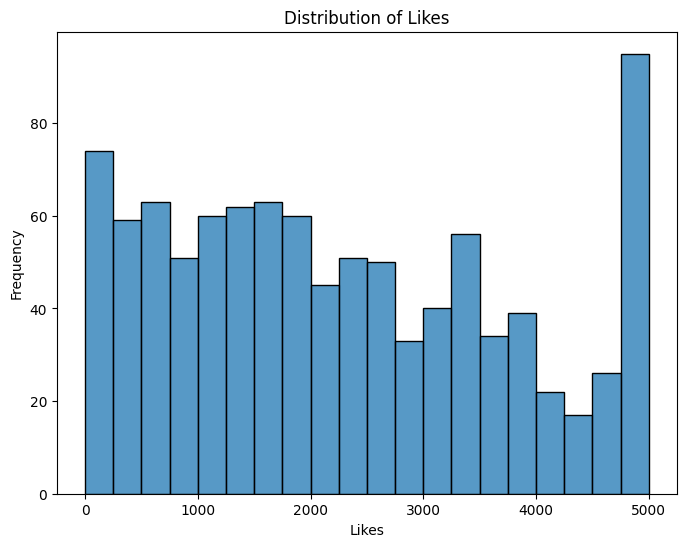

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(pandas_df["likes"], bins=20)
plt.title("Distribution of Likes")
plt.xlabel("Likes")
plt.ylabel("Frequency")
plt.show()

